<a href="https://colab.research.google.com/github/emanuel379/Introducao-a-Computacao-no-Mercado-Financeiro/blob/main/Trabalho_1_SSC0964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho 1 SSC0964 - Introdução à Computação no Mercado Financeiro**

Amanda Caroline de Oliveira Pires - 12559090

Emanuel Victor da Silva Favorato - 12558151

Rafael Zimmer - 12542612

## **Análise de Portfólio**

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Bibliotecas e Funções**

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [ ]:
acoes = ['ITUB4.SA', 'BBDC4.SA', 'DIRR3.SA', 'JBSS3.SA','GUAR3.SA', 'PSSA3.SA']

ydata = yf.download(acoes, '2015-01-01', '2019-12-31', '1d');
dados = ydata["Adj Close"]

[*********************100%***********************]  6 of 6 completed


In [ ]:
dados = dados *100 / dados.iloc[0]
display(dados)

,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,100.206247,95.179220,96.835295,100.502429,100.473945,99.806489
2015-01-06,103.502748,92.459807,96.517586,102.128292,98.104279,98.548415
2015-01-07,107.615987,94.190343,98.289387,105.823194,100.853085,98.709678
2015-01-08,108.170233,95.920880,96.847540,107.478484,101.706181,98.064527
...,...,...,...,...,...,...
2019-12-20,258.607095,240.583808,249.859407,252.892631,263.111271,279.456050
2019-12-23,260.201326,244.995076,254.630303,255.248354,266.349522,281.233499
2019-12-26,263.461892,256.532237,264.171978,259.128284,268.069908,282.344387


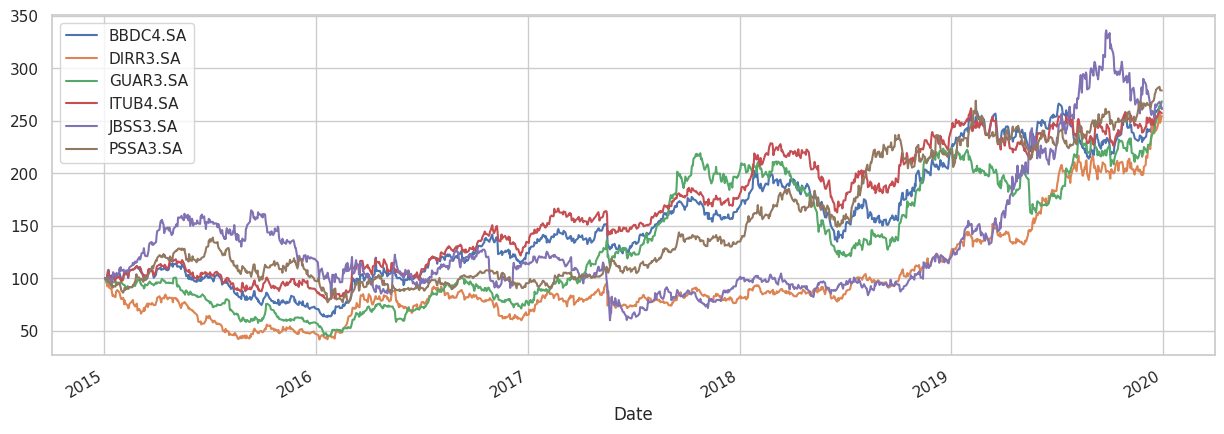

In [ ]:
dados.plot(figsize = (15,5));

In [ ]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_acc = (dados.iloc[-1] / dados.iloc[0])-1
print("Retorno acumulado:\n", ret_acc)

Retorno acumulado:
 BBDC4.SA    1.620853
DIRR3.SA    1.544963
GUAR3.SA    1.684991
ITUB4.SA    1.570497
JBSS3.SA    1.610873
PSSA3.SA    1.787895
dtype: float64


In [ ]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Retorno anualizado:\n", ret_aa)

Retorno anualizado:
 BBDC4.SA    0.212519
DIRR3.SA    0.205414
GUAR3.SA    0.218396
ITUB4.SA    0.207823
JBSS3.SA    0.211594
PSSA3.SA    0.227595
dtype: float64


In [ ]:
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol anualizada:\n", vol_aa)

Vol anualizada:
 BBDC4.SA    0.331798
DIRR3.SA    0.400726
GUAR3.SA    0.344750
ITUB4.SA    0.297345
JBSS3.SA    0.507458
PSSA3.SA    0.317775
dtype: float64


In [ ]:
#Calculo da correlação dos dados
dados_chg.corr()

,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA
BBDC4.SA,1.000000,0.408805,0.347110,0.864000,0.212604,0.374536
DIRR3.SA,0.408805,1.000000,0.274931,0.400456,0.130129,0.207388
GUAR3.SA,0.347110,0.274931,1.000000,0.349739,0.113822,0.189640
ITUB4.SA,0.864000,0.400456,0.349739,1.000000,0.217089,0.373093
JBSS3.SA,0.212604,0.130129,0.113822,0.217089,1.000000,0.117784
PSSA3.SA,0.374536,0.207388,0.189640,0.373093,0.117784,1.000000


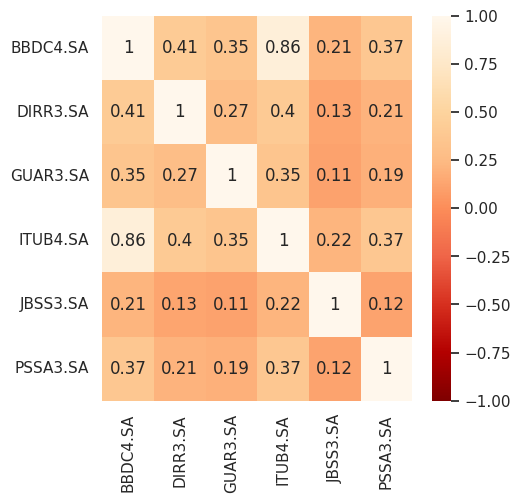

In [ ]:
# Gráfico correlação

plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(dados_chg.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap="OrRd_r")

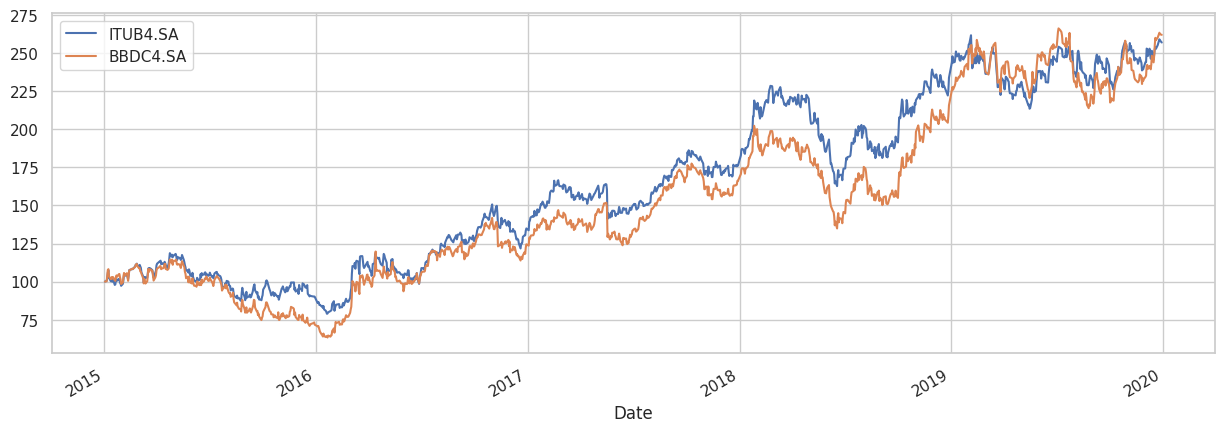

In [ ]:
dados[['ITUB4.SA', 'BBDC4.SA']].plot(figsize = (15,5));

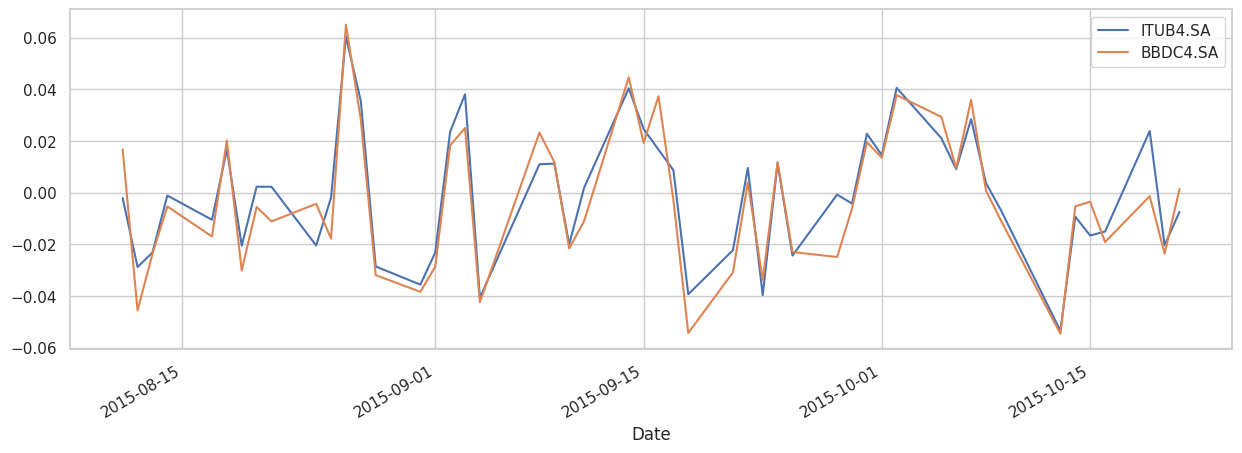

In [ ]:
dados_chg[['ITUB4.SA', 'BBDC4.SA']].iloc[150:200].plot(figsize = (15,5));

In [ ]:
port_pesos = [0.5, 0, 0, 0.5, 0, 0]
dados['PORT1'] = dados.dot(port_pesos)

In [ ]:
display(dados)

,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA,PORT1
Date,,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,100.206290,95.179229,96.835296,100.502578,100.473945,99.806469,100.354434
2015-01-06,103.502759,92.459816,96.517587,102.128331,98.104267,98.548375,102.815545
2015-01-07,107.616051,94.190353,98.289364,105.823227,100.853085,98.709678,106.719639
2015-01-08,108.170276,95.920889,96.847523,107.478621,101.706169,98.064527,107.824448
...,...,...,...,...,...,...,...
2019-12-20,258.607186,240.583832,249.859348,252.892763,263.111248,279.456021,255.749974
2019-12-23,260.201227,244.995081,254.630243,255.248427,266.349522,281.233450,257.724827
2019-12-26,263.462004,256.532262,264.171892,259.128477,268.069860,282.344338,261.295241


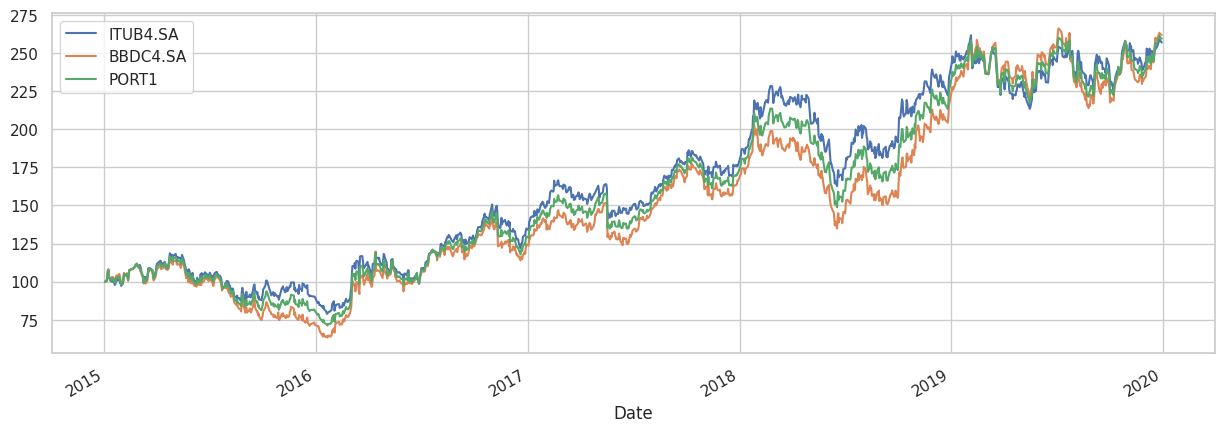

In [ ]:
dados[['ITUB4.SA', 'BBDC4.SA', 'PORT1']].plot(figsize = (15,5));

In [ ]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_acc = (dados.iloc[dados.count()[0]-1] / dados.iloc[0])-1
print("Retorno acumulado:\n", ret_acc)
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Ret aa:\n", ret_aa)

Retorno acumulado:
 BBDC4.SA    1.620852
DIRR3.SA    1.544963
GUAR3.SA    1.684990
ITUB4.SA    1.570499
JBSS3.SA    1.610873
PSSA3.SA    1.787895
PORT1       1.595675
dtype: float64
Ret aa:
 BBDC4.SA    0.212519
DIRR3.SA    0.205414
GUAR3.SA    0.218396
ITUB4.SA    0.207824
JBSS3.SA    0.211594
PSSA3.SA    0.227595
PORT1       0.210180
dtype: float64


In [ ]:
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol aa:\n", vol_aa)

Vol aa:
 BBDC4.SA    0.331799
DIRR3.SA    0.400726
GUAR3.SA    0.344750
ITUB4.SA    0.297345
JBSS3.SA    0.507458
PSSA3.SA    0.317775
PORT1       0.303037
dtype: float64


In [ ]:
#Calcular drawdown
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

BBDC4.SA   -44.706206
DIRR3.SA   -58.090383
GUAR3.SA   -54.837134
ITUB4.SA   -33.548713
JBSS3.SA   -63.482701
PSSA3.SA   -44.466931
PORT1      -38.953326
dtype: float64


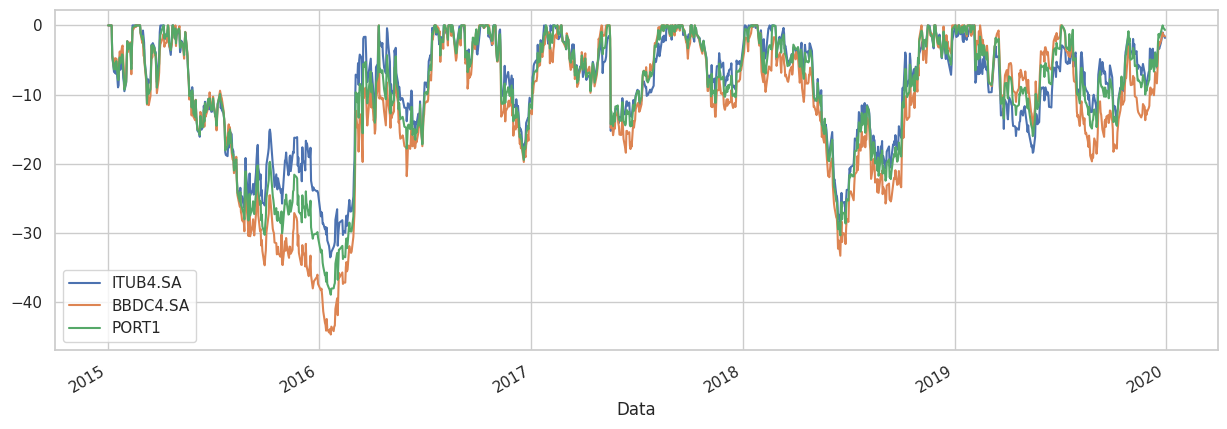

In [ ]:
ddown[['ITUB4.SA', 'BBDC4.SA', 'PORT1']].plot(figsize = (15,5));

**Segunda parte: Fronteira Eficiente de Markowitz**

In [ ]:
dados=dados.drop(['PORT1'], axis=1)
dados_chg=dados_chg.drop(['PORT1'], axis=1)

In [ ]:
dados

,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,100.206290,95.179229,96.835296,100.502578,100.473945,99.806469
2015-01-06,103.502759,92.459816,96.517587,102.128331,98.104267,98.548375
2015-01-07,107.616051,94.190353,98.289364,105.823227,100.853085,98.709678
2015-01-08,108.170276,95.920889,96.847523,107.478621,101.706169,98.064527
...,...,...,...,...,...,...
2019-12-20,258.607186,240.583832,249.859348,252.892763,263.111248,279.456021
2019-12-23,260.201227,244.995081,254.630243,255.248427,266.349522,281.233450
2019-12-26,263.462004,256.532262,264.171892,259.128477,268.069860,282.344338


In [ ]:
def calc_ret_vol(ativos, ativos_chg, port_pesos):
  port = ativos.dot(port_pesos)
  port_chg =port.pct_change()
  port_chg = port_chg.fillna(0)
  ret = ((port.iloc[-1]/port.iloc[0])**(1/5))-1
  vol = port_chg.std()*np.sqrt(252)
  return ret, vol

In [ ]:
#Portfolio com 2 ativos: ITUB4.SA e BBDC4.SA
points = []
min_vol_ret = [100, 0] #[vol, ret]
port_pesos = [0, 0, 0, 0, 0, 0]
for w in range(0, 101, 5):
  ret, vol = calc_ret_vol(dados, dados_chg, [ w/100, 0, 0, (1-w/100), 0, 0])
  print(f"Aloc:{round(w/100, 2):.2f} {round(1-(w/100),2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
  points.append([ret, vol])
  if vol < min_vol_ret[0]:
    min_vol_ret[0] = vol
    min_vol_ret[1] = ret
    port_pesos[2] = w/100
    port_pesos[4] = 1-w/100

Aloc:0.00 1.00 Ret:0.208 Vol:0.297
Aloc:0.05 0.95 Ret:0.208 Vol:0.297
Aloc:0.10 0.90 Ret:0.208 Vol:0.297
Aloc:0.15 0.85 Ret:0.209 Vol:0.297
Aloc:0.20 0.80 Ret:0.209 Vol:0.297
Aloc:0.25 0.75 Ret:0.209 Vol:0.297
Aloc:0.30 0.70 Ret:0.209 Vol:0.298
Aloc:0.35 0.65 Ret:0.209 Vol:0.299
Aloc:0.40 0.60 Ret:0.210 Vol:0.300
Aloc:0.45 0.55 Ret:0.210 Vol:0.301
Aloc:0.50 0.50 Ret:0.210 Vol:0.303
Aloc:0.55 0.45 Ret:0.210 Vol:0.305
Aloc:0.60 0.40 Ret:0.211 Vol:0.307
Aloc:0.65 0.35 Ret:0.211 Vol:0.309
Aloc:0.70 0.30 Ret:0.211 Vol:0.312
Aloc:0.75 0.25 Ret:0.211 Vol:0.314
Aloc:0.80 0.20 Ret:0.212 Vol:0.317
Aloc:0.85 0.15 Ret:0.212 Vol:0.321
Aloc:0.90 0.10 Ret:0.212 Vol:0.324
Aloc:0.95 0.05 Ret:0.212 Vol:0.328
Aloc:1.00 0.00 Ret:0.213 Vol:0.332


In [ ]:
print(min_vol_ret)
print(port_pesos)

[0.29678690152731657, 0.20829635795737933]
[0, 0, 0.1, 0, 0.9, 0]


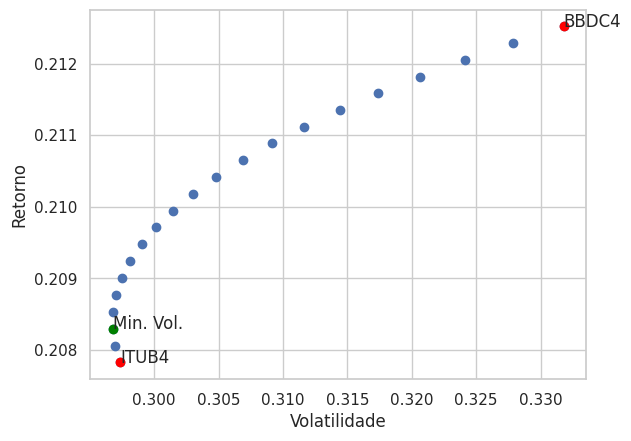

In [ ]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(vol_aa['BBDC4.SA'], ret_aa['BBDC4.SA'], color='red');
plt.text(vol_aa['BBDC4.SA'], ret_aa['BBDC4.SA'], 'BBDC4');

plt.scatter(vol_aa['ITUB4.SA'], ret_aa['ITUB4.SA'], color='red');
plt.text(vol_aa['ITUB4.SA'], ret_aa['ITUB4.SA'], 'ITUB4');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [ ]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Ret aa:\n", ret_aa)
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol aa:\n", vol_aa)

Ret aa:
 BBDC4.SA    0.212519
DIRR3.SA    0.205414
GUAR3.SA    0.218396
ITUB4.SA    0.207824
JBSS3.SA    0.211594
PSSA3.SA    0.227595
PORT1       0.212281
dtype: float64
Vol aa:
 BBDC4.SA    0.331799
DIRR3.SA    0.400726
GUAR3.SA    0.344750
ITUB4.SA    0.297345
JBSS3.SA    0.507458
PSSA3.SA    0.317775
PORT1       0.461247
dtype: float64


In [ ]:
#Calcular drawdown
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

BBDC4.SA   -44.706206
DIRR3.SA   -58.090383
GUAR3.SA   -54.837134
ITUB4.SA   -33.548713
JBSS3.SA   -63.482701
PSSA3.SA   -44.466931
PORT1      -57.723465
dtype: float64


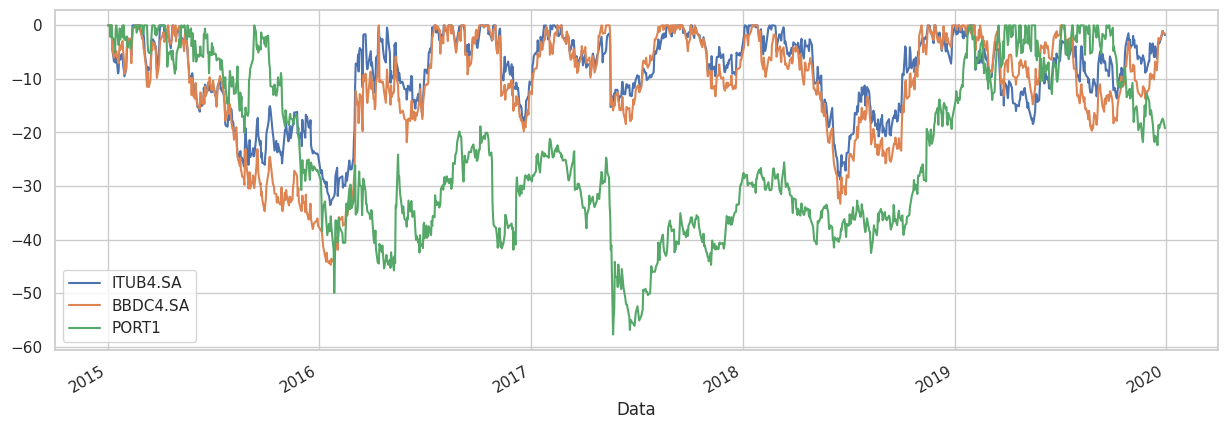

In [ ]:
ddown[['ITUB4.SA', 'BBDC4.SA', 'PORT1']].plot(figsize = (15,5));

In [ ]:
dados=dados.drop(['PORT1'], axis=1)
dados_chg=dados_chg.drop(['PORT1'], axis=1)

In [ ]:
#Portfolio com 3 ativos: ITUB4, DIRR3 e BBDC4
points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0, 0, 0]
for w1 in range(0, 101, 5):
  for w2 in range(0, 101-w1, 5):
    ret, vol = calc_ret_vol(dados, dados_chg, [w1/100, w2/100, 0, (1-w1/100-w2/100), 0, 0])
    #print("Aloc:", round(w1/100, 2), round(w2/100, 2), round(1-w1/100-w2/100, 2), "Ret:", round(ret, 3), "Vol:", round(vol, 3))
    print(f"Aloc:{round(w1/100, 2):.2f} {round(w2/100, 2):.2f} {round(1-w1/100-w2/100, 2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
    points.append([ret, vol])
    if vol < min_vol_ret[0]:
      min_vol_ret[0] = vol
      min_vol_ret[1] = ret
      port_pesos[2] = w1/100
      port_pesos[4] = w2/100
      port_pesos[5] = 1-w1/100-w2/100

Aloc:0.00 0.00 1.00 Ret:0.208 Vol:0.297
Aloc:0.00 0.05 0.95 Ret:0.208 Vol:0.293
Aloc:0.00 0.10 0.90 Ret:0.208 Vol:0.290
Aloc:0.00 0.15 0.85 Ret:0.207 Vol:0.286
Aloc:0.00 0.20 0.80 Ret:0.207 Vol:0.284
Aloc:0.00 0.25 0.75 Ret:0.207 Vol:0.281
Aloc:0.00 0.30 0.70 Ret:0.207 Vol:0.280
Aloc:0.00 0.35 0.65 Ret:0.207 Vol:0.279
Aloc:0.00 0.40 0.60 Ret:0.207 Vol:0.279
Aloc:0.00 0.45 0.55 Ret:0.207 Vol:0.280
Aloc:0.00 0.50 0.50 Ret:0.207 Vol:0.282
Aloc:0.00 0.55 0.45 Ret:0.207 Vol:0.286
Aloc:0.00 0.60 0.40 Ret:0.206 Vol:0.291
Aloc:0.00 0.65 0.35 Ret:0.206 Vol:0.297
Aloc:0.00 0.70 0.30 Ret:0.206 Vol:0.305
Aloc:0.00 0.75 0.25 Ret:0.206 Vol:0.315
Aloc:0.00 0.80 0.20 Ret:0.206 Vol:0.327
Aloc:0.00 0.85 0.15 Ret:0.206 Vol:0.342
Aloc:0.00 0.90 0.10 Ret:0.206 Vol:0.358
Aloc:0.00 0.95 0.05 Ret:0.206 Vol:0.378
Aloc:0.00 1.00 0.00 Ret:0.205 Vol:0.401
Aloc:0.05 0.00 0.95 Ret:0.208 Vol:0.297
Aloc:0.05 0.05 0.90 Ret:0.208 Vol:0.293
Aloc:0.05 0.10 0.85 Ret:0.208 Vol:0.289
Aloc:0.05 0.15 0.80 Ret:0.208 Vol:0.286


In [ ]:
print(min_vol_ret)
print(port_pesos)

[0.27904852456838974, 0.20721961077158957]
[0, 0, 0.05, 0, 0.35, 0.6]


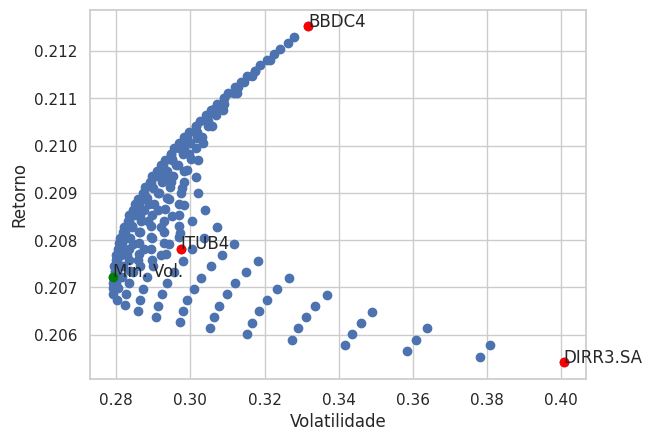

In [ ]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(vol_aa['BBDC4.SA'], ret_aa['BBDC4.SA'], color='red');
plt.text(vol_aa['BBDC4.SA'], ret_aa['BBDC4.SA'], 'BBDC4');

plt.scatter(vol_aa['DIRR3.SA'], ret_aa['DIRR3.SA'], color='red');
plt.text(vol_aa['DIRR3.SA'], ret_aa['DIRR3.SA'], 'DIRR3.SA');

plt.scatter(vol_aa['ITUB4.SA'], ret_aa['ITUB4.SA'], color='red');
plt.text(vol_aa['ITUB4.SA'], ret_aa['ITUB4.SA'], 'ITUB4');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [ ]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = (dados - dados.shift(1)) / dados.shift(1)
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Ret aa:\n", ret_aa)
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol aa:\n", vol_aa)

Ret aa:
 BBDC4.SA    0.212519
DIRR3.SA    0.205414
GUAR3.SA    0.218396
ITUB4.SA    0.207824
JBSS3.SA    0.211594
PSSA3.SA    0.227595
PORT1       0.221628
dtype: float64
Vol aa:
 BBDC4.SA    0.331799
DIRR3.SA    0.400726
GUAR3.SA    0.344750
ITUB4.SA    0.297345
JBSS3.SA    0.507458
PSSA3.SA    0.317775
PORT1       0.279207
dtype: float64


In [ ]:
#Calcular drawdown (valor de queda de um ativo em comparação ao valor máximo de cotação anterior)
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

BBDC4.SA   -44.706206
DIRR3.SA   -58.090383
GUAR3.SA   -54.837134
ITUB4.SA   -33.548713
JBSS3.SA   -63.482701
PSSA3.SA   -44.466931
PORT1      -42.982440
dtype: float64


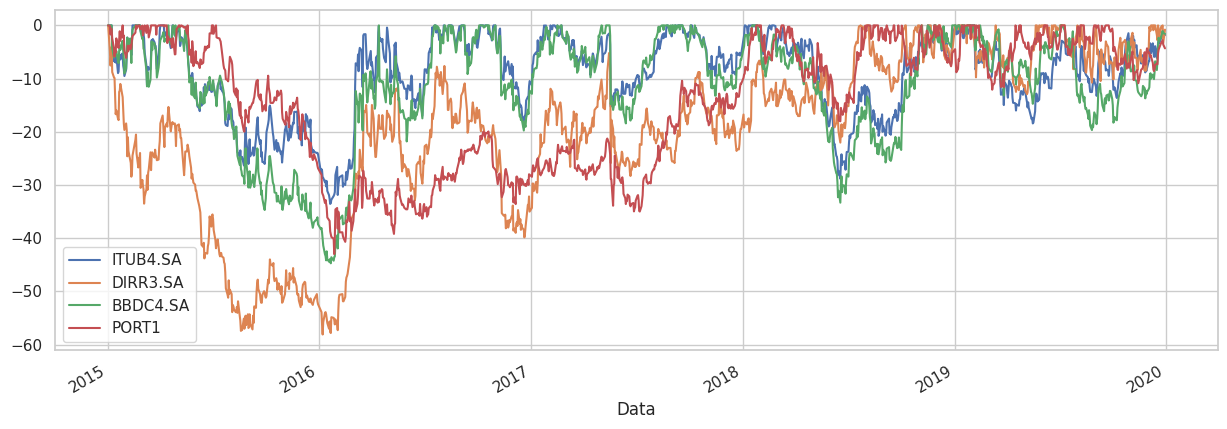

In [ ]:
ddown[['ITUB4.SA', 'DIRR3.SA', 'BBDC4.SA', 'PORT1']].plot(figsize = (15,5));

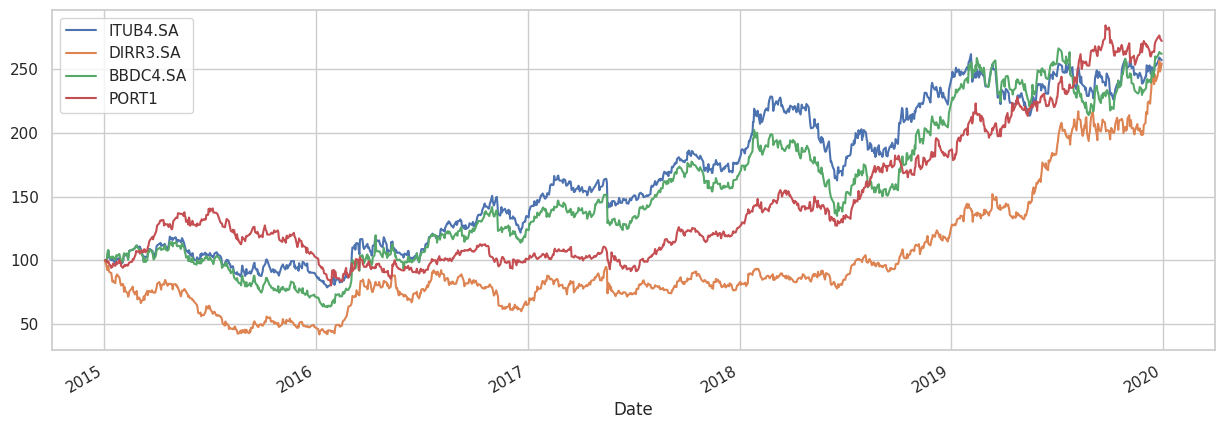

In [ ]:
dados[['ITUB4.SA', 'DIRR3.SA', 'BBDC4.SA', 'PORT1']].plot(figsize = (15,5));